In [1]:
from sensray import PlanetModel, CoordinateConverter

[24.399999999999636, 2891.0, 5149.5]


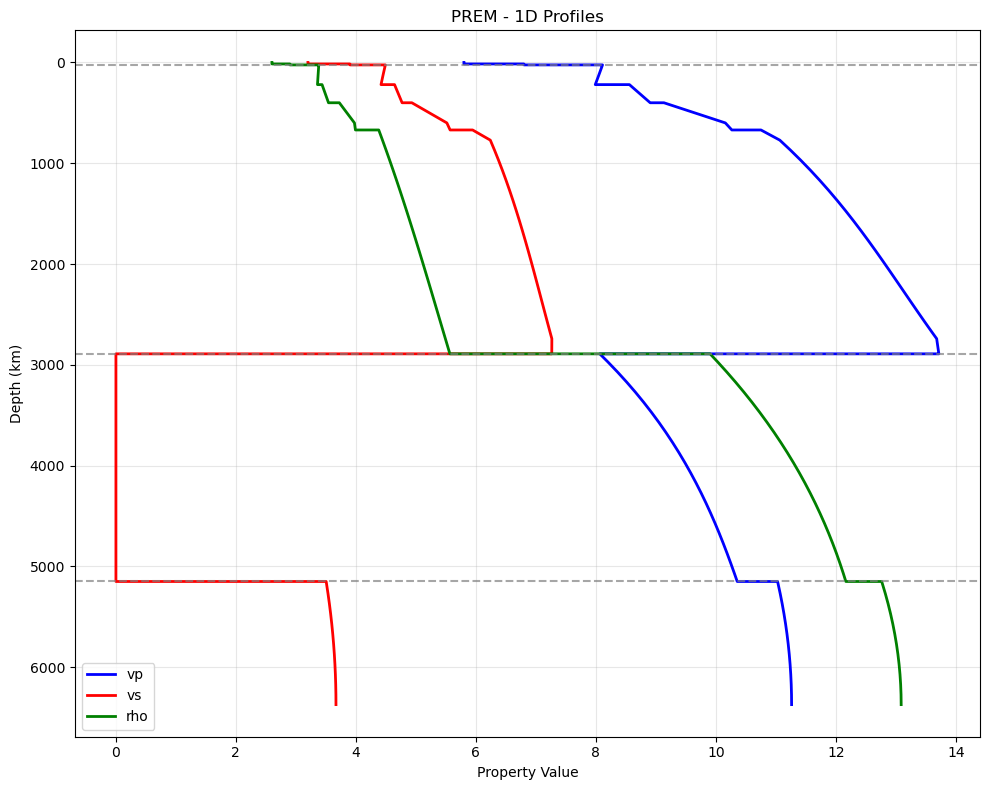

In [2]:
my_model = PlanetModel.from_standard_model('prem')

my_model.plot_profiles()

print(my_model.get_discontinuities(as_depths=True))

In [3]:
my_model.create_mesh(mesh_type='tetrahedral', mesh_size_km=500.0, populate_properties=['vp', 'vs', 'rho'])

Generated tetrahedral mesh: 46781 cells, 7993 points
Populated properties: ['vp', 'vs', 'rho']
Populated properties: ['vp', 'vs', 'rho']


In [4]:
source_lat, source_lon, source_depth = 0.0, 0.0, 100.0  # Example source location
receiver_lat, receiver_lon = 0.0, 60.0
plane_normal = CoordinateConverter.compute_gc_plane_normal(
    source_lat, source_lon, receiver_lat, receiver_lon
)
p = my_model.mesh.plot_cross_section(plane_normal=plane_normal, property_name='vs')
p.show()

Widget(value='<iframe src="http://localhost:39811/index.html?ui=P_0x7f2a128b2ed0_0&reconnect=auto" class="pyvi…

In [5]:
# Compute ray path lengths through the generated mesh and store as cell data for visualization
# Uses the same source/receiver defined above (source_lat, source_lon, source_depth,
# receiver_lat, receiver_lon)

rays = my_model.taupy_model.get_ray_paths_geo(
    source_depth_in_km=source_depth,
    source_latitude_in_deg=source_lat,
    source_longitude_in_deg=source_lon,
    receiver_latitude_in_deg=receiver_lat,
    receiver_longitude_in_deg=receiver_lon,
    phase_list=["P"],
)

ray = rays[0]  # Take the first arrival
my_model.mesh.compute_ray_lengths_from_arrival(ray, store_as='P_ray_length_km')
my_model.mesh.plot_cross_section(plane_normal=plane_normal, property_name='P_ray_length_km').show()

Building obspy.taup model for '/disks/data/PhD/masters/SensRay/sensray/models/prem.nd' ...
filename = /disks/data/PhD/masters/SensRay/sensray/models/prem.nd
Done reading velocity model.
Radius of model . is 6371.0
Using parameters provided in TauP_config.ini (or defaults if not) to call SlownessModel...
Parameters are:
taup.create.min_delta_p = 0.1 sec / radian
taup.create.max_delta_p = 11.0 sec / radian
taup.create.max_depth_interval = 115.0 kilometers
taup.create.max_range_interval = 0.04363323129985824 degrees
taup.create.max_interp_error = 0.05 seconds
taup.create.allow_inner_core_s = True
Slow model  553 P layers,646 S layers
Done calculating Tau branches.
Done Saving /tmp/prem.npz
Method run is done, but not necessarily successful.
Parameters are:
taup.create.min_delta_p = 0.1 sec / radian
taup.create.max_delta_p = 11.0 sec / radian
taup.create.max_depth_interval = 115.0 kilometers
taup.create.max_range_interval = 0.04363323129985824 degrees
taup.create.max_interp_error = 0.05 se

Widget(value='<iframe src="http://localhost:39811/index.html?ui=P_0x7f29fc1a0f10_1&reconnect=auto" class="pyvi…

In [6]:
my_model.mesh.list_properties()

Mesh properties summary:
  cell_data keys: ['vp', 'vs', 'rho', 'vtkOriginalCellIds', 'P_ray_length_km']

Cell property summaries (first entries):
 - vp: min=5.800000190734863, max=13.716544151306152, non_zero=46781
 - vs: min=0.0, max=7.2659687995910645, non_zero=40392
 - rho: min=2.5999999046325684, max=13.067302703857422, non_zero=46781
 - vtkOriginalCellIds: min=0.0, max=46780.0, non_zero=46780
 - P_ray_length_km: min=0.0, max=544.8200073242188, non_zero=44


{'cell_data': {'vp': {'shape': (46781,),
   'dtype': 'float32',
   'min': 5.800000190734863,
   'max': 13.716544151306152,
   'sum': 473033.28125,
   'non_zero': 46781,
   'preview': [5.800000190734863,
    5.800000190734863,
    5.800000190734863,
    5.800000190734863,
    5.800000190734863,
    5.800000190734863,
    5.800000190734863,
    5.800000190734863,
    5.800000190734863,
    5.800000190734863]},
  'vs': {'shape': (46781,),
   'dtype': 'float32',
   'min': 0.0,
   'max': 7.2659687995910645,
   'sum': 226269.78125,
   'non_zero': 40392,
   'preview': [3.200000047683716,
    3.200000047683716,
    3.200000047683716,
    3.200000047683716,
    3.200000047683716,
    3.200000047683716,
    3.200000047683716,
    3.200000047683716,
    3.200000047683716,
    3.200000047683716]},
  'rho': {'shape': (46781,),
   'dtype': 'float32',
   'min': 2.5999999046325684,
   'max': 13.067302703857422,
   'sum': 240270.15625,
   'non_zero': 46781,
   'preview': [2.5999999046325684,
    2.5999